In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Taller 1: Métodos Computacionales
### Estudiantes: Andrés Hernández ()    Francisco Díaz (201912252)

## 1. Caída libre
### 1.1 
Considere las ecuaciones de movimiento para una partícula en caída libre para el caso ideal:

$$
\begin{align*}
m\frac{d^{2}y}{dt^{2}} &= -mg   & y(t) &= y_{0} +v_{0}t-\frac{1}{2}gt^{2} 
\end{align*}
$$
donde $g= 9.8 \; m/s^2$ ,$y_{0} = 0$ y $v_{0} = 50 \; m/s $.

**a)** Dibuje la posición y velocidad como función del tiempo, iterando hasta que el sistema llegue hasta la posición inicial.

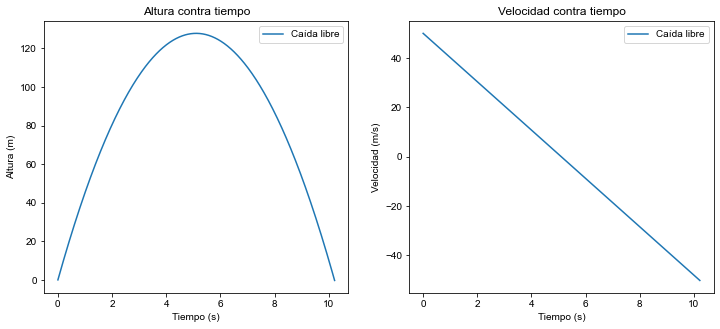

In [2]:
#Primero definiremos las clases de acuerdo al tipo de movimiento que el usuario requiera:
class libre:
    g=9.8
    def __init__(self,y0=0.0,vy0=50.0,m0=2.0):
        self.y=y0
        self.vy=vy0
        self.m=m0
        self.Fy=-m0*self.g
        self.Ttotal = 0
    def muevete(self,dt):
        self.y += self.vy*dt
        self.vy += (self.Fy/self.m)*dt
    def imprime(self,t):
        return "{0:.3f}   {1:.3f}   {2:.3f}".format(t,self.y,self.vy)
    def darY(self,t):
        return self.y
class amortiguado(libre):
    def __init__(self,y0=0.0,vy0=50.0,m0=2.0,C0=0.8,rho0 = 1.225, R0 = 0.05):
        super().__init__(y0,vy0,m0)
        self.C=C0
        self.rho = rho0
        self.R= R0
        self.Fy=-m0*self.g+(1/2)*rho0*C0*(np.pi*(R0**2))*(vy0**2)
    def muevete(self,dt):
        super().muevete(dt)
        self.Fy=-self.m*self.g-(1/2)*self.rho*self.C*(np.pi*(self.R**2))*(self.vy**2)
    def imprime(self,t):
        return "{0:.3f}   {1:.3f}   {2:.3f}".format(t,self.y,self.vy)
#Definiremos las variables globales correspondientes a los tiempos de vuelo de cada movimiento

TFinal1, TFinal2 = 0. , 0.

#Para generar el conjunto de datos creamos un archivo temporal .dat

def generardatos(clase,filename,c):
    if filename == "amortiguado":
        cuerpo=clase(C0=c)
    else:
        cuerpo=clase()
    t=0.0
    dt=1.0e-2  #Diferencial de tiempo que utilizaremos
    f=open(filename+".dat","w+")
    while cuerpo.darY(t) >= 0:    
        st=cuerpo.imprime(t)
        f.write(st+"\n")
        cuerpo.muevete(dt)
        t+=dt
    st=cuerpo.imprime(t)
    #Almacenamos el tiempo de vuelo del respectivo tipo de movimiento para el punto (c)
    if filename =='libre':
        global TFinal1
        TFinal1=t
    else:
        global TFinal2
        TFinal2=t
    f.write(st)
    f.close()


#Generamos y realizamos la lectura de los datos. Adicionalmente, eliminamos el archivo temporal.

generardatos(libre,"libre",0.8)
def readxyv(filename,i,j,k):
    f=open(filename+".dat","r")
    l=f.readlines()
    f.close()
    x,y,v=[],[],[]
    for n in l:
        dat=n.split()
        x.append(float(dat[i]))
        y.append(float(dat[j]))
        v.append(float(dat[k]))
    os.remove(filename+".dat")
    return x,y,v

### Ahora graficaremos la trayectoría par la caída libre ideal

x1,y1,v1=readxyv("libre",0,1,2)

fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(121)
ax1.plot(x1,y1,label="Caída libre")
ax1.set(xlabel='Tiempo (s)', ylabel='Altura (m)',title='Altura contra tiempo')
ax1.legend()

ax2=fig.add_subplot(122)
ax2.plot(x1,v1,label="Caída libre")
ax2.set(xlabel='Tiempo (s)', ylabel='Velocidad (m/s)',title='Velocidad contra tiempo')
ax2.legend()

plt.style.use('seaborn-whitegrid')
plt.show()



Ahora asuma que el sistema está sometido a una fuerza resistiva:
\begin{align*}
 m\frac{d^{2}y}{dt^{2}} &= -b +\frac{1}{2}C \rho A v^{2}  & y(t) &= y_{0} + \frac{1}{\gamma ^{2}} ln \left [ \frac{\cosh(\tanh^{-1}(\frac{\gamma v_{0}}{\sqrt{g}}))}{\cosh(-\gamma \sqrt{g}t+\tanh^{-1}(\frac{\gamma v_{0}}{\sqrt{g}})}\right]
\end{align*}

 donde $C=0.8$ , $\rho = 1.225 \; kg/m^{3}$ y $A=\pi R^{2}$ con $R=0.05 \; m$.
 #### Nota: La demostración analítica de estas ecuaciones se encuentra adjunta en formato pdf.
 
 **b)** Dibuje la posición y velocidad como función del tiempo en la misma gráfica del caso ideal

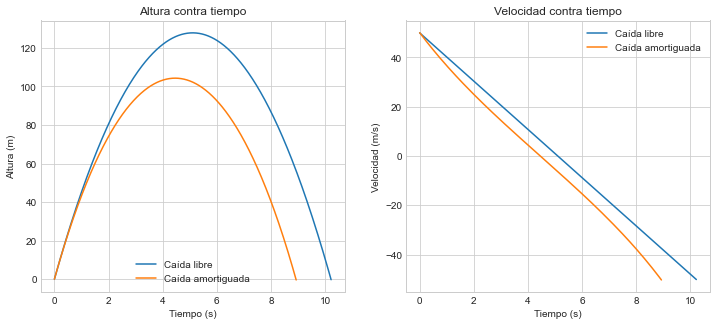

In [3]:
#Generamos los datos correspondientes al movimiento amortiguado.
generardatos(amortiguado,"amortiguado",0.8)

### Ahora graficaremos las trayectorias

x2,y2,v2=readxyv("amortiguado",0,1,2)

fig2=plt.figure(figsize=(12,5))
ax3=fig2.add_subplot(121)
ax3.plot(x1,y1,label="Caída libre")
ax3.plot(x2,y2,label="Caída amortiguada")
ax3.set(xlabel='Tiempo (s)', ylabel='Altura (m)',title='Altura contra tiempo')

ax4=fig2.add_subplot(122)
ax4.plot(x1,v1,label="Caída libre")
ax4.plot(x2,v2,label="Caída amortiguada")
ax4.set(xlabel='Tiempo (s)', ylabel='Velocidad (m/s)',title='Velocidad contra tiempo')
ax3.legend()
ax4.legend()
plt.style.use('seaborn-whitegrid')
plt.show()



**c)** ¿Cuál es el tiempo de vuelo para ambos casos?

In [4]:
print("Utilizando los datos almacenados en el inciso (a) tenemos que: \nTiempo de vuelo caída libre = " +str(TFinal1)+ " s \nTiempo de vuelo caida amortiguada = "+str(TFinal2)+" s")


Utilizando los datos almacenados en el inciso (a) tenemos que: 
Tiempo de vuelo caída libre = 10.219999999999827 s 
Tiempo de vuelo caida amortiguada = 8.929999999999854 s


**d)** ) Estudie el comportamiento del tiempo de vuelo como función de C.


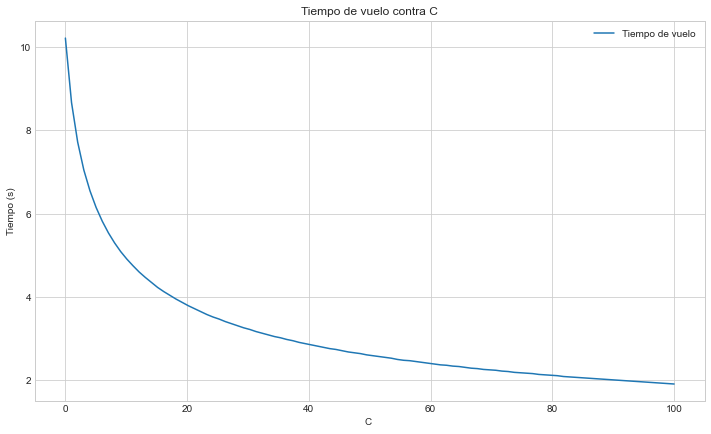

In [14]:
#Definiremos una nueva función generadora de datos en la que solo almacenaremos el tiempo de vuelo respecto al valor de entrada C
def generardatosC(clase,c):
    tiempoVuelo=[]
    i=0
    while i < len(c):
        cuerpo=clase(C0=c[i])
        t=0.0
        dt=1.0e-2 
        while cuerpo.darY(t) >= 0:    
            cuerpo.muevete(dt)
            t+=dt
        tiempoVuelo.append(t)  
        i +=1
    return tiempoVuelo


#Graficando el tiempo de vuelo contra el parámetro experimental C

c=np.linspace(0 , 100 , 100)
tiempos= generardatosC(amortiguado,c)

plt.figure(figsize=(12,7))
plt.plot(c,tiempos,label="Tiempo de vuelo")
ax=plt.gca()
ax.set(xlabel='C ', ylabel='Tiempo (s)',title='Tiempo de vuelo contra C')

plt.legend()
plt.style.use('seaborn-whitegrid')
plt.show()

    